LightGBM Accuracy: 0.83
              precision    recall  f1-score   support

         bad       0.84      0.85      0.84     28577
        good       0.81      0.79      0.80     23143

    accuracy                           0.83     51720
   macro avg       0.82      0.82      0.82     51720
weighted avg       0.83      0.83      0.83     51720



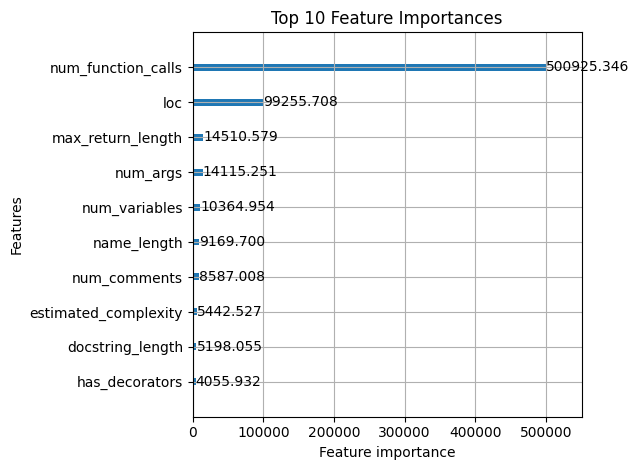

In [11]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load preprocessed data
X_train = pd.read_parquet('../data/processed/X_train.parquet')
X_test = pd.read_parquet('../data/processed/X_test.parquet')
y_train = pd.read_parquet('../data/processed/y_train.parquet').squeeze()
y_test = pd.read_parquet('../data/processed/y_test.parquet').squeeze()

# Drop the non-numeric 'code_snippet' column
X_train = X_train.drop(columns=['code_snippet'])
X_test = X_test.drop(columns=['code_snippet'])

# Encode labels if they are not numeric
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Train LightGBM classifier
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train_enc)

# Predict
y_pred = lgbm.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test_enc, y_pred)
print(f"LightGBM Accuracy: {round(accuracy, 2)}")

# Classification report
print(classification_report(y_test_enc, y_pred, target_names=label_encoder.classes_))

# Feature importance plot
lgb.plot_importance(lgbm, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()
